In [15]:
import os
from tabulate import tabulate
from bs4 import BeautifulSoup
import sys
import requests
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# 2. Extract data from the website

In [23]:
extract_contents = lambda row: [x.text.replace('\n','') for x in row]
URL = 'https://www.mohfw.gov.in/'
SHORT_HEADERS =['SNo', 'State', 'India-Confirmed','Foreign-Confirmed','Cured/Discharge','Death']
response = requests.get(URL).content
soup = BeautifulSoup(response,'html.parser')
header = extract_contents(soup.tr.find_all('th'))
stats = []
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td'))
    if stat:
        if len(stat) == 5:
            # for last row 
            stat = ['', *stat]
            stats.append(stat)
        elif(len(stat) == 6):
            stats.append(stat)
print("Total Cases : \n" + str(stats))            
#stats[-1][0] = "Summery : "
x = stats[-1]
stats.remove(stats[-1])



Total Cases : 
[['1', 'Andaman and Nicobar Islands', '1', '0', '0', '0'], ['2', 'Andhra Pradesh', '12', '0', '1', '0'], ['3', 'Bihar', '6', '0', '0', '1'], ['4', 'Chandigarh', '7', '0', '0', '0'], ['5', 'Chhattisgarh', '6', '0', '0', '0'], ['6', 'Delhi', '35', '1', '6', '1'], ['7', 'Goa', '3', '0', '0', '0'], ['8', 'Gujarat', '42', '1', '0', '3'], ['9', 'Haryana', '16', '14', '11', '0'], ['10', 'Himachal Pradesh', '3', '0', '0', '1'], ['11', 'Jammu and Kashmir', '13', '0', '1', '1'], ['12', 'Karnataka', '55', '0', '3', '2'], ['13', 'Kerala', '129', '8', '11', '0'], ['14', 'Ladakh', '13', '0', '3', '0'], ['15', 'Madhya Pradesh', '20', '0', '0', '1'], ['16', 'Maharashtra', '127', '3', '15', '4'], ['17', 'Manipur', '1', '0', '0', '0'], ['18', 'Mizoram', '1', '0', '0', '0'], ['19', 'Odisha', '2', '0', '0', '0'], ['20', 'Puducherry', '1', '0', '0', '0'], ['21', 'Punjab', '33', '0', '0', '1'], ['22', 'Rajasthan', '39', '2', '3', '0'], ['23', 'Tamil Nadu', '23', '6', '1', '1'], ['24', 'Teleng

In [18]:
# 3.table formation

In [24]:
objects = []
for row in stats:
    objects.append(row[1])
y_pos = np.arange(len(objects))
performance = []
for row in stats:
    performance.append(int(row[2]) + int(row[3]))

table = tabulate(stats, headers = SHORT_HEADERS)
print(table)


  SNo  State                          India-Confirmed    Foreign-Confirmed    Cured/Discharge    Death
-----  ---------------------------  -----------------  -------------------  -----------------  -------
    1  Andaman and Nicobar Islands                  1                    0                  0        0
    2  Andhra Pradesh                              12                    0                  1        0
    3  Bihar                                        6                    0                  0        1
    4  Chandigarh                                   7                    0                  0        0
    5  Chhattisgarh                                 6                    0                  0        0
    6  Delhi                                       35                    1                  6        1
    7  Goa                                          3                    0                  0        0
    8  Gujarat                                     42                    

In [47]:

print('Summery     India-Confirmed       Foreign-Confirmed       Cured/Discharge      Death  ')
#print(x) 
print(" "+"Total"+"          "+x[2]+"                "+x[3]+"                        "+x[4]+"              "+x[5])



Summery     India-Confirmed       Foreign-Confirmed       Cured/Discharge      Death  
 Total          677#                47                         67              17


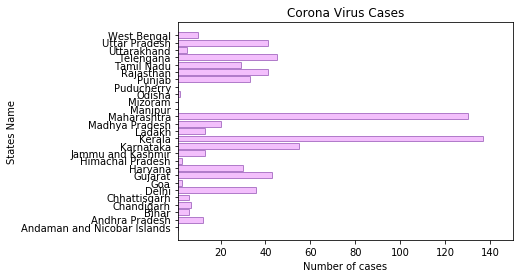

In [43]:
# 4.plot the graph

plt.barh(y_pos, performance, align= "center", alpha=0.5, color = (234/256.0,128/256.0,252/256.0),edgecolor = (106/256.0,27/256.0,154/256.0))

plt.yticks(y_pos, objects)
plt.xlim(1,150)
plt.xlabel("Number of cases")
plt.ylabel("States Name")
plt.title("Corona Virus Cases")
plt.show()